In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from keras import regularizers
from keras.models import Sequential
from keras.layers import Conv1D,MaxPool1D,Flatten,Dense,Dropout,Activation
from keras.optimizers        import Adam  

def my_model():
    model = Sequential()
    model.add(Conv1D(64,7,padding='same',activation='relu',input_shape=(200,4),kernel_regularizer=regularizers.l1_l2(0.001,0.001)))
    model.add(MaxPool1D(2))
    model.add(Conv1D(64,7,padding='same',activation='relu'))
    model.add(MaxPool1D(2))
    
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
    return model   



model = my_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 200, 64)           1856      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 100, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 64)           28736     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

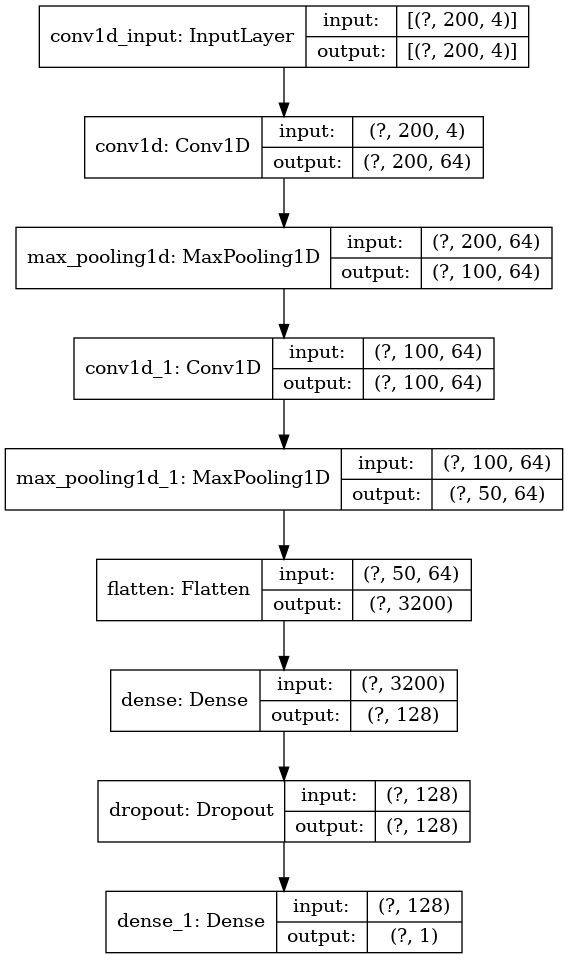

In [4]:

from keras.utils import plot_model
plot_model(model,show_shapes=True)